In [5]:
#pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn

In [21]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("train.csv")
test_df    = pd.read_csv("test.csv")

# preview the data
titanic_df.head();


In [22]:
print("----------------------------")
print("TRAINING DATA:")
print("----------------------------")
titanic_df.info()
print("----------------------------")
print("TESTING DATA:")
print("----------------------------")
test_df.info()

----------------------------
TRAINING DATA:
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
TESTING DATA:
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null

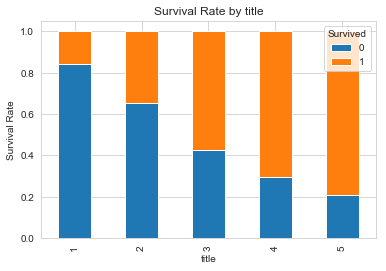

In [23]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

def title_map(title):
    if title in ['Mr']:
        return 1
    elif title in ['Master']:
        return 3
    elif title in ['Ms','Mlle','Miss']:
        return 4
    elif title in ['Mme','Mrs']:
        return 5
    else:
        return 2
    
titanic_df['title'] = titanic_df['Name'].apply(get_title).apply(title_map)   
test_df['title'] = test_df['Name'].apply(get_title).apply(title_map)

title_xt = pd.crosstab(titanic_df['title'], titanic_df['Survived'])

title_xt_pct = title_xt.div(title_xt.sum(1).astype(float), axis=0)

title_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Survival Rate by title')
plt.xlabel('title')
t=plt.ylabel('Survival Rate')

In [ ]:
# Set ages to mean ages grouped by title:
titanic_df['title']='Mrs'
for i in range(len(titanic_df['Name'])):
    titanic_df['title'].values[i-1]= re.search('([A-Za-z]+)\.', titanic_df['Name'].values[i-1]).group()
    
test_df['title']='Mrs'
for i in range(len(test_df['Name'])):
    test_df['title'].values[i-1]= re.search('([A-Za-z]+)\.', test_df['Name'].values[i-1]).group()    

In [24]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)

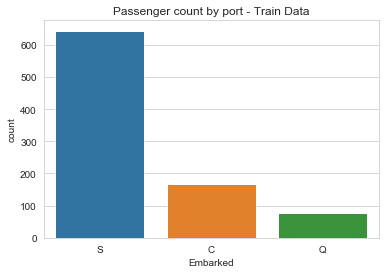

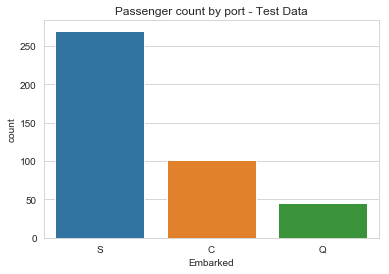

In [25]:
# Embarked:
ax = sns.countplot(x="Embarked", data=titanic_df,
              order = titanic_df['Embarked'].value_counts().index).set_title('Passenger count by port - Train Data');
plt.show()
ax = sns.countplot(x="Embarked", data=test_df,
              order = titanic_df['Embarked'].value_counts().index).set_title('Passenger count by port - Test Data');
plt.show()

In [26]:
# Embarked

# Fill the two missing values with the highest occurring value, which is "S".
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

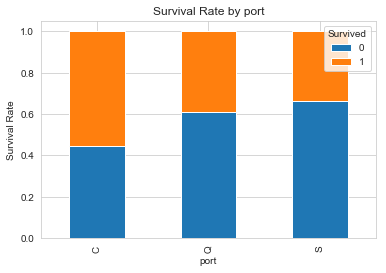

In [27]:
# Survival rate by port of departure.
# My assumption will be, based on the rate results below, that the port of departure dictated to a certain extent
# which part of the ship the passengers were in. And thus, the Embarked value is import to the survival determination.

title_xt = pd.crosstab(titanic_df['Embarked'], titanic_df['Survived'])
title_xt_pct = title_xt.div(title_xt.sum(1).astype(float), axis=0)
title_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by port')
xlabel=plt.xlabel('port')
ylabel=plt.ylabel('Survival Rate')

In [28]:
def embarked_map(embarked):
    if embarked in ['C']:
        return 1
    elif embarked in ['Q']:
        return 2
    else:
        return 3
                    
titanic_df['embarkedport'] = titanic_df['Embarked'].apply(embarked_map)                       
test_df['embarkedport'] = test_df['Embarked'].apply(embarked_map)    

In [29]:
# drop another unnecessary column
titanic_df = titanic_df.drop(['Embarked','Cabin'], axis=1)
test_df    = test_df.drop(['Embarked','Cabin'], axis=1)

In [30]:
# Replace 'male' with 1 and 'female' with 2
titanic_df['Sex'].replace(['female','male'],[2,1],inplace=True)
test_df['Sex'].replace(['female','male'],[2,1],inplace=True)

In [33]:
## Zero fares?
a=titanic_df['Fare']==0
a.sum()

15

In [34]:
## Zero fares?
a=test_df['Fare']==0
a.sum()

2

In [ ]:
#Fill in the missing fares with the median fare of the non zero fares;
nonZeroFares = titanic_df[titanic_df['Fare'] > 0]
nonZeroMean = nonZeroFares['Fare'].mean()
titanic_df.loc[titanic_df['Fare'] == 0, 'Fare'] = nonZeroMean
titanic_df['Fare'] = titanic_df['Fare'].astype(int)

In [ ]:
age=titanic_df[titanic_df['Age'].notnull()]
age=age[['title','Age']]
agegrouped=age.groupby(['title']).mean()
agegrouped.rename(columns={'title': 'GroupedTitle', 'Age': 'GroupedAge'}, inplace=True)
agegrouped['GroupedTitle'] = agegrouped.index.values
titanic_df = titanic_df.merge(agegrouped, left_on='title', right_on='GroupedTitle', how='left')
titanic_df.loc[titanic_df['Age'].isnull(), 'Age'] = titanic_df['GroupedAge']
titanic_df['Age'] = titanic_df['Age'].astype(int)

In [31]:
print("----------------------------")
print("TRAINING DATA:")
print("----------------------------")
titanic_df.info();
print("----------------------------")
print(titanic_df.head());
print("----------------------------")
print("----------------------------")
print("----------------------------")
print("----------------------------")
print("TESTING DATA:")
print("----------------------------")
test_df.info();
print("----------------------------")
print(test_df.head());

----------------------------
TRAINING DATA:
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Sex             891 non-null int64
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Fare            891 non-null float64
title           891 non-null int64
embarkedport    891 non-null int64
dtypes: float64(2), int64(7)
memory usage: 62.7 KB
----------------------------
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  title  embarkedport
0         0       3    1  22.0      1      0   7.2500      1             3
1         1       1    2  38.0      1      0  71.2833      5             1
2         1       3    2  26.0      0      0   7.9250      4             3
3         1       1    2  35.0      1      0  53.1000      5             3
4         0       3    1  35.0      0      0   8.